In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
dataset = pd.read_csv("../house-prices-advanced-regression-techniques/train.csv")

In [56]:
dataset

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [43]:
for each in dataset.columns:
    print(each, dataset[each].isna().sum())

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 259
LotArea 0
Street 0
Alley 1369
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 8
MasVnrArea 8
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinSF1 0
BsmtFinType2 38
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageCars 0
GarageArea 0
GarageQual 81
GarageCond 81
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 1453
Fence 1179
MiscFeature 1406
MiscVal 0
MoSold 0
YrSol

In [33]:
print(dataset.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [34]:
features = ['LotArea', 'YearBuilt', 'RoofStyle', 'BedroomAbvGr',
           'GarageArea', 'OverallCond',  'LotFrontage']

In [48]:
for each in dataset[features]:
    print(each, dataset[each].isna().sum())

LotArea 0
YearBuilt 0
RoofStyle 0
BedroomAbvGr 0
GarageArea 0
OverallCond 0
LotFrontage 259


In [239]:
target = ['SalePrice']
known_result = dataset[target]

In [218]:
filtered_dataset = dataset[features]
filtered_dataset

LotArea  YearBuilt RoofStyle  BedroomAbvGr  GarageArea  OverallCond  \
0        8450       2003     Gable             3         548            5   
1        9600       1976     Gable             3         460            8   
2       11250       2001     Gable             3         608            5   
3        9550       1915     Gable             3         642            5   
4       14260       2000     Gable             4         836            5   
...       ...        ...       ...           ...         ...          ...   
1455     7917       1999     Gable             3         460            5   
1456    13175       1978     Gable             3         500            6   
1457     9042       1941     Gable             4         252            9   
1458     9717       1950       Hip             2         240            6   
1459     9937       1965     Gable             3         276            6   

      LotFrontage  
0            65.0  
1            80.0  
2            68.0  
3            60.0  
4            84.0  
...           ...  
1455         62.0  
1456         85.0  
1457         66.0  
1458         68.0  
1459         75.0  

[1460 rows x 7 columns]

In [219]:
filtered_dataset['Age'] = 0

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [220]:
filtered_dataset['Age'] = 2019 - filtered_dataset['YearBuilt']

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [221]:
filtered_dataset

LotArea  YearBuilt RoofStyle  BedroomAbvGr  GarageArea  OverallCond  \
0        8450       2003     Gable             3         548            5   
1        9600       1976     Gable             3         460            8   
2       11250       2001     Gable             3         608            5   
3        9550       1915     Gable             3         642            5   
4       14260       2000     Gable             4         836            5   
...       ...        ...       ...           ...         ...          ...   
1455     7917       1999     Gable             3         460            5   
1456    13175       1978     Gable             3         500            6   
1457     9042       1941     Gable             4         252            9   
1458     9717       1950       Hip             2         240            6   
1459     9937       1965     Gable             3         276            6   

      LotFrontage  Age  
0            65.0   16  
1            80.0   43  
2            68.0   18  
3            60.0  104  
4            84.0   19  
...           ...  ...  
1455         62.0   20  
1456         85.0   41  
1457         66.0   78  
1458         68.0   69  
1459         75.0   54  

[1460 rows x 8 columns]

In [222]:
filtered_dataset.drop('YearBuilt', axis=1, inplace=True)

In [223]:
filtered_dataset

LotArea RoofStyle  BedroomAbvGr  GarageArea  OverallCond  LotFrontage  \
0        8450     Gable             3         548            5         65.0   
1        9600     Gable             3         460            8         80.0   
2       11250     Gable             3         608            5         68.0   
3        9550     Gable             3         642            5         60.0   
4       14260     Gable             4         836            5         84.0   
...       ...       ...           ...         ...          ...          ...   
1455     7917     Gable             3         460            5         62.0   
1456    13175     Gable             3         500            6         85.0   
1457     9042     Gable             4         252            9         66.0   
1458     9717       Hip             2         240            6         68.0   
1459     9937     Gable             3         276            6         75.0   

      Age  
0      16  
1      43  
2      18  
3     104  
4      19  
...   ...  
1455   20  
1456   41  
1457   78  
1458   69  
1459   54  

[1460 rows x 7 columns]

In [224]:
filtered_dataset.describe()  

LotArea  BedroomAbvGr   GarageArea  OverallCond  LotFrontage  \
count    1460.000000   1460.000000  1460.000000  1460.000000  1201.000000   
mean    10516.828082      2.866438   472.980137     5.575342    70.049958   
std      9981.264932      0.815778   213.804841     1.112799    24.284752   
min      1300.000000      0.000000     0.000000     1.000000    21.000000   
25%      7553.500000      2.000000   334.500000     5.000000    59.000000   
50%      9478.500000      3.000000   480.000000     5.000000    69.000000   
75%     11601.500000      3.000000   576.000000     6.000000    80.000000   
max    215245.000000      8.000000  1418.000000     9.000000   313.000000   

               Age  
count  1460.000000  
mean     47.732192  
std      30.202904  
min       9.000000  
25%      19.000000  
50%      46.000000  
75%      65.000000  
max     147.000000

In [225]:
# above describe() shows Mean and 50%(Median) of LotFrontage is closer so, replacing NaN with Mean
filtered_dataset['LotFrontage'] = filtered_dataset['LotFrontage'].fillna(70)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [226]:
filtered_dataset.isna().sum()

LotArea         0
RoofStyle       0
BedroomAbvGr    0
GarageArea      0
OverallCond     0
LotFrontage     0
Age             0
dtype: int64

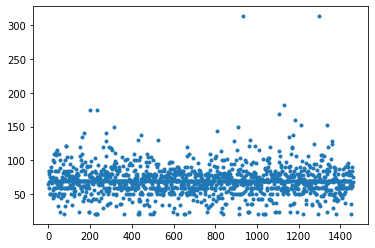

In [227]:
plt.plot(filtered_dataset['LotFrontage'], '.')

In [89]:
#filtered_dataset[filtered_dataset['LotFrontage'] > 250] = 70 # inserting the outliers with Mean value

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [168]:
#plt.plot(filtered_dataset['LotFrontage'], '.')

In [169]:
#filtered_dataset[filtered_dataset['LotFrontage'] > 250] # No more outliers

In [228]:
filtered_dataset

LotArea RoofStyle  BedroomAbvGr  GarageArea  OverallCond  LotFrontage  \
0        8450     Gable             3         548            5         65.0   
1        9600     Gable             3         460            8         80.0   
2       11250     Gable             3         608            5         68.0   
3        9550     Gable             3         642            5         60.0   
4       14260     Gable             4         836            5         84.0   
...       ...       ...           ...         ...          ...          ...   
1455     7917     Gable             3         460            5         62.0   
1456    13175     Gable             3         500            6         85.0   
1457     9042     Gable             4         252            9         66.0   
1458     9717       Hip             2         240            6         68.0   
1459     9937     Gable             3         276            6         75.0   

      Age  
0      16  
1      43  
2      18  
3     104  
4      19  
...   ...  
1455   20  
1456   41  
1457   78  
1458   69  
1459   54  

[1460 rows x 7 columns]

In [93]:
# Need to Encode the roof style to numbering system

In [229]:
Subset= filtered_dataset[['RoofStyle']]
Subset

RoofStyle
0        Gable
1        Gable
2        Gable
3        Gable
4        Gable
...        ...
1455     Gable
1456     Gable
1457     Gable
1458       Hip
1459     Gable

[1460 rows x 1 columns]

In [230]:
Subset['RoofStyle'].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [231]:
from sklearn.preprocessing import LabelEncoder

In [232]:
ohe_values = pd.get_dummies(Subset)

In [233]:
ohe_values

RoofStyle_Flat  RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  \
0                  0                1                  0              0   
1                  0                1                  0              0   
2                  0                1                  0              0   
3                  0                1                  0              0   
4                  0                1                  0              0   
...              ...              ...                ...            ...   
1455               0                1                  0              0   
1456               0                1                  0              0   
1457               0                1                  0              0   
1458               0                0                  0              1   
1459               0                1                  0              0   

      RoofStyle_Mansard  RoofStyle_Shed  
0                     0               0  
1                     0               0  
2                     0               0  
3                     0               0  
4                     0               0  
...                 ...             ...  
1455                  0               0  
1456                  0               0  
1457                  0               0  
1458                  0               0  
1459                  0               0  

[1460 rows x 6 columns]

In [234]:
filtered_dataset = pd.concat([filtered_dataset, ohe_values], axis=1)

In [235]:
filtered_dataset

LotArea RoofStyle  BedroomAbvGr  GarageArea  OverallCond  LotFrontage  \
0        8450     Gable             3         548            5         65.0   
1        9600     Gable             3         460            8         80.0   
2       11250     Gable             3         608            5         68.0   
3        9550     Gable             3         642            5         60.0   
4       14260     Gable             4         836            5         84.0   
...       ...       ...           ...         ...          ...          ...   
1455     7917     Gable             3         460            5         62.0   
1456    13175     Gable             3         500            6         85.0   
1457     9042     Gable             4         252            9         66.0   
1458     9717       Hip             2         240            6         68.0   
1459     9937     Gable             3         276            6         75.0   

      Age  RoofStyle_Flat  RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  \
0      16               0                1                  0              0   
1      43               0                1                  0              0   
2      18               0                1                  0              0   
3     104               0                1                  0              0   
4      19               0                1                  0              0   
...   ...             ...              ...                ...            ...   
1455   20               0                1                  0              0   
1456   41               0                1                  0              0   
1457   78               0                1                  0              0   
1458   69               0                0                  0              1   
1459   54               0                1                  0              0   

      RoofStyle_Mansard  RoofStyle_Shed  
0                     0               0  
1                     0               0  
2                     0               0  
3                     0               0  
4                     0               0  
...                 ...             ...  
1455                  0               0  
1456                  0               0  
1457                  0               0  
1458                  0               0  
1459                  0               0  

[1460 rows x 13 columns]

In [236]:
filtered_dataset.drop(['RoofStyle'], axis = 1, inplace=True)

In [237]:
filtered_dataset

LotArea  BedroomAbvGr  GarageArea  OverallCond  LotFrontage  Age  \
0        8450             3         548            5         65.0   16   
1        9600             3         460            8         80.0   43   
2       11250             3         608            5         68.0   18   
3        9550             3         642            5         60.0  104   
4       14260             4         836            5         84.0   19   
...       ...           ...         ...          ...          ...  ...   
1455     7917             3         460            5         62.0   20   
1456    13175             3         500            6         85.0   41   
1457     9042             4         252            9         66.0   78   
1458     9717             2         240            6         68.0   69   
1459     9937             3         276            6         75.0   54   

      RoofStyle_Flat  RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  \
0                  0                1                  0              0   
1                  0                1                  0              0   
2                  0                1                  0              0   
3                  0                1                  0              0   
4                  0                1                  0              0   
...              ...              ...                ...            ...   
1455               0                1                  0              0   
1456               0                1                  0              0   
1457               0                1                  0              0   
1458               0                0                  0              1   
1459               0                1                  0              0   

      RoofStyle_Mansard  RoofStyle_Shed  
0                     0               0  
1                     0               0  
2                     0               0  
3                     0               0  
4                     0               0  
...                 ...             ...  
1455                  0               0  
1456                  0               0  
1457                  0               0  
1458                  0               0  
1459                  0               0  

[1460 rows x 12 columns]

### Training and Modeling

In [240]:
from sklearn.linear_model import LinearRegression

In [241]:
lr = LinearRegression()

In [266]:
known_result

SalePrice
0        208500
1        181500
2        223500
3        140000
4        250000
...         ...
1455     175000
1456     210000
1457     266500
1458     142125
1459     147500

[1460 rows x 1 columns]

In [267]:
from sklearn.model_selection import train_test_split

In [343]:
X_train, X_test, Y_train, Y_test = train_test_split(filtered_dataset, known_result, test_size = 0.20)

In [344]:
model = lr.fit(X_train, Y_train )

In [345]:
pred_values = model.predict(X_test)

In [346]:
outcome = Y_test

In [347]:
outcome ['Predicted'] = pred_values

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [348]:
outcome['Predicted'] = outcome['Predicted'].round()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [349]:
outcome

SalePrice  Predicted
465      178740   201347.0
69       225000   178537.0
933      190000   215887.0
37       153000   192036.0
1363     156932   202166.0
...         ...        ...
1193     165000   197865.0
1168     235000   221296.0
284      179200   179527.0
911      143500   165934.0
1275     137000   160370.0

[292 rows x 2 columns]

In [350]:
from sklearn.metrics import mean_absolute_error

In [360]:
mean_absolute_error(outcome['SalePrice'], outcome['Predicted'])

34848.1198630137

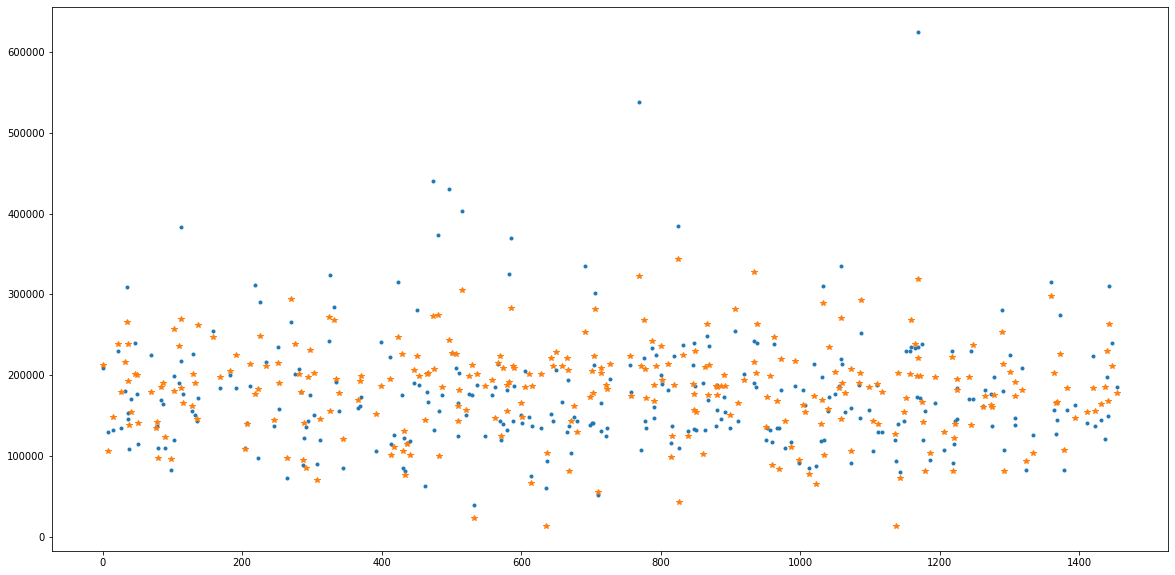

In [352]:
plt.figure(figsize = (20, 10) )
plt.plot(outcome['SalePrice'],'.', outcome['Predicted'],'*')

In [339]:
model.coef_

array([[ 1.09550747e+00,  1.13270025e+04,  1.48497790e+02,
         9.28902952e+03,  3.13075307e+02, -9.62159330e+02,
        -4.91740318e+03, -1.58465541e+04,  9.17075584e+03,
         6.71349067e+03, -2.60159575e+03,  7.48130647e+03]])

In [340]:
model.intercept_

array([49977.78038255])

### Decision Tree Regression 

In [361]:
from sklearn.tree import DecisionTreeRegressor

In [362]:
dtr = DecisionTreeRegressor()

In [366]:
model = dtr.fit(X_train, Y_train)

In [367]:
dtr_predicted = model.predict(X_test)

In [368]:
mean_absolute_error(outcome['SalePrice'], dtr_predicted)

37096.577625570775

### Random Forest Regressor

In [371]:
from sklearn.ensemble import RandomForestRegressor

In [372]:
rfr = RandomForestRegressor()
model = rfr.fit(X_train, Y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [373]:
rfr_predicted = model.predict(X_test)

In [375]:
mean_absolute_error(outcome['SalePrice'], rfr_predicted)

27388.03824200913